In [ ]:
import pandas as pd
import numpy as np

In [4]:
data1=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
data1.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
data1

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [6]:
print(data1.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [7]:
data1.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


# **Time Series Visualization**

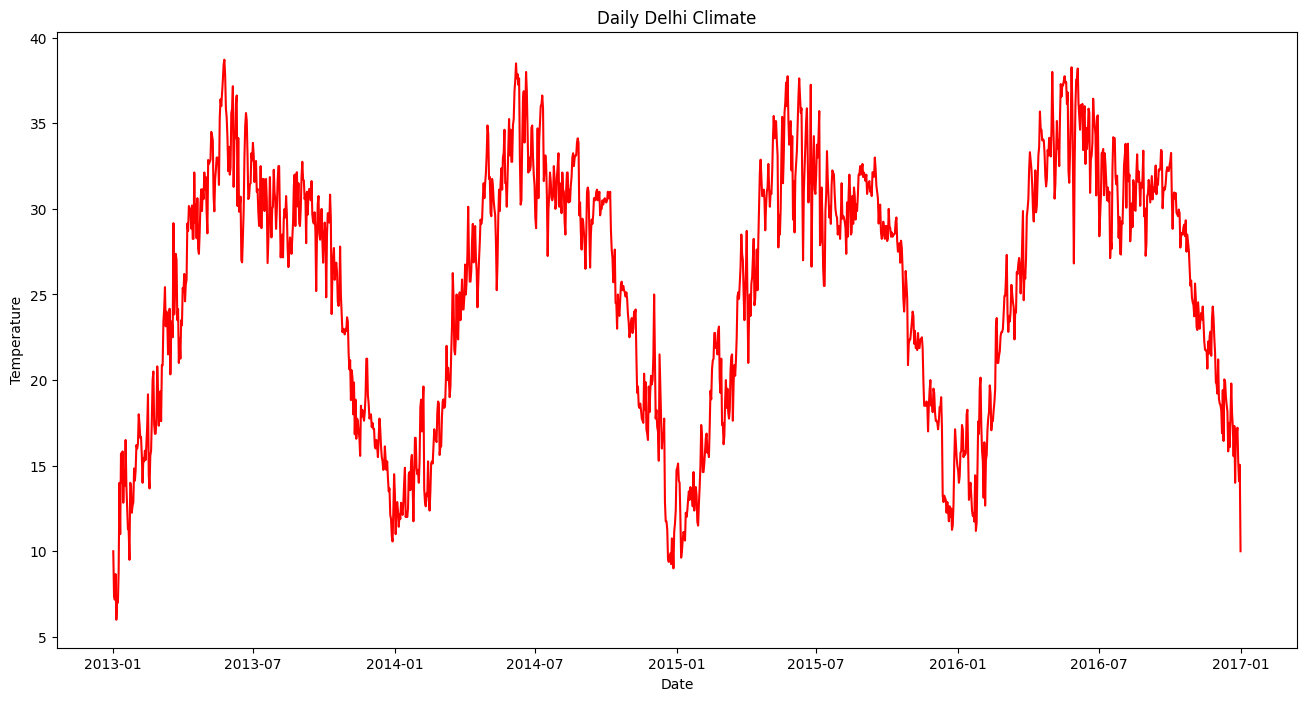

In [9]:
import matplotlib.pyplot as plt
data1['date'] = pd.to_datetime(data1['date'])
plt.figure(figsize=(16,8))
plt.plot(data1.date,data1.meantemp,color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Delhi Climate')
plt.show()

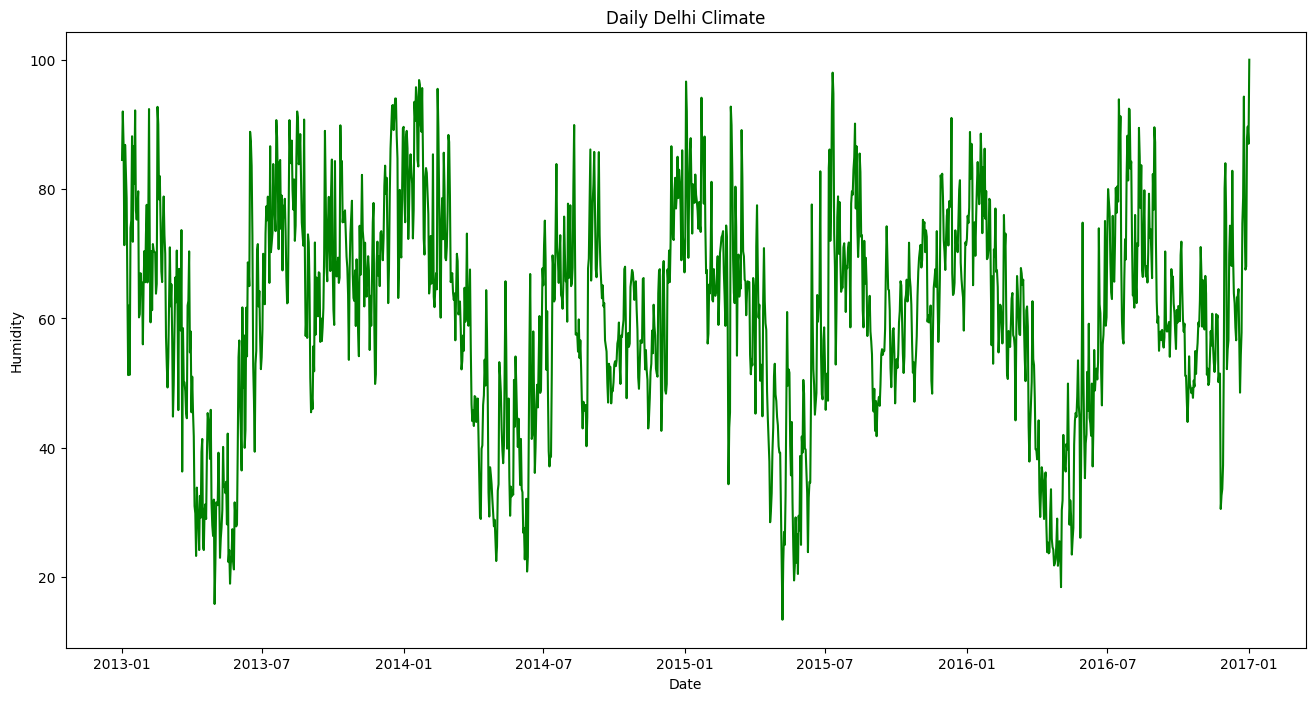

In [11]:
plt.figure(figsize=(16,8))
plt.plot(data1.date,data1.humidity	,color='green')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Daily Delhi Climate')
plt.show()

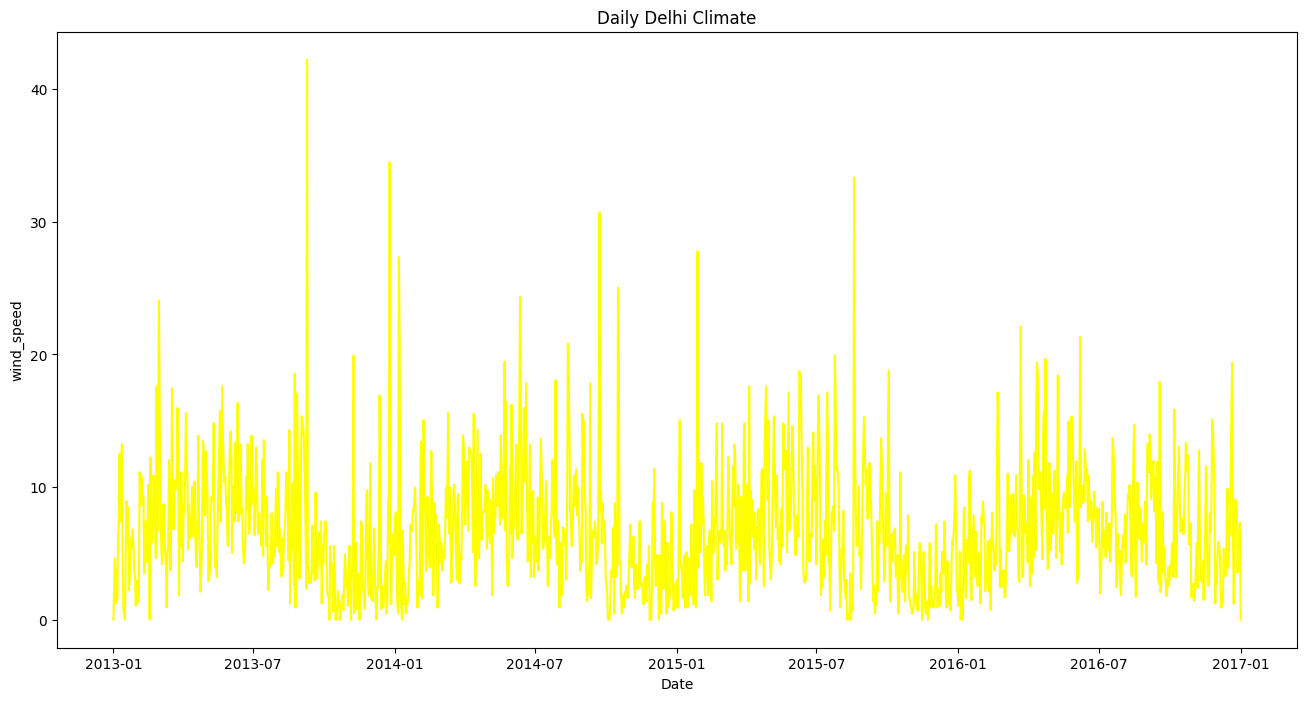

In [13]:
plt.figure(figsize=(16,8))
plt.plot(data1.date,data1.wind_speed,color='yellow')
plt.xlabel('Date')
plt.ylabel('wind_speed')
plt.title('Daily Delhi Climate')
plt.show()

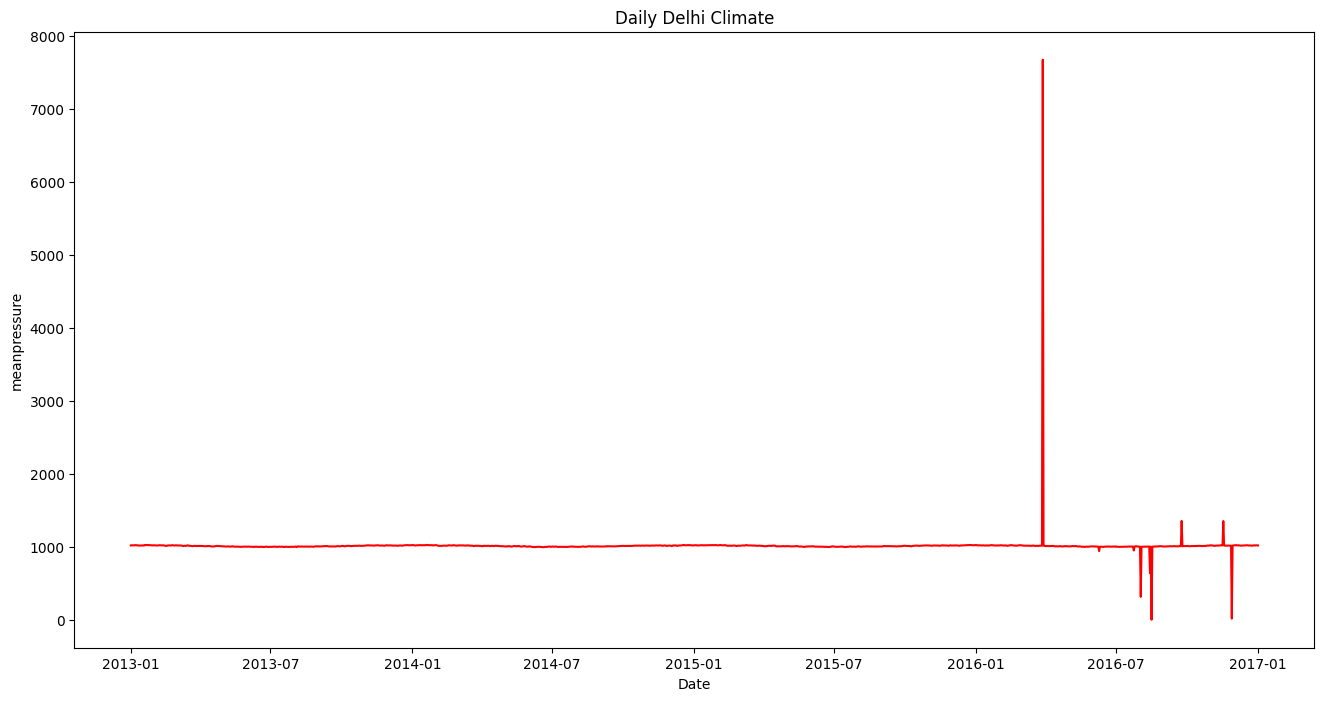

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data1.date,data1.meanpressure,color='red')
plt.xlabel('Date')
plt.ylabel('meanpressure')
plt.title('Daily Delhi Climate')
plt.show()

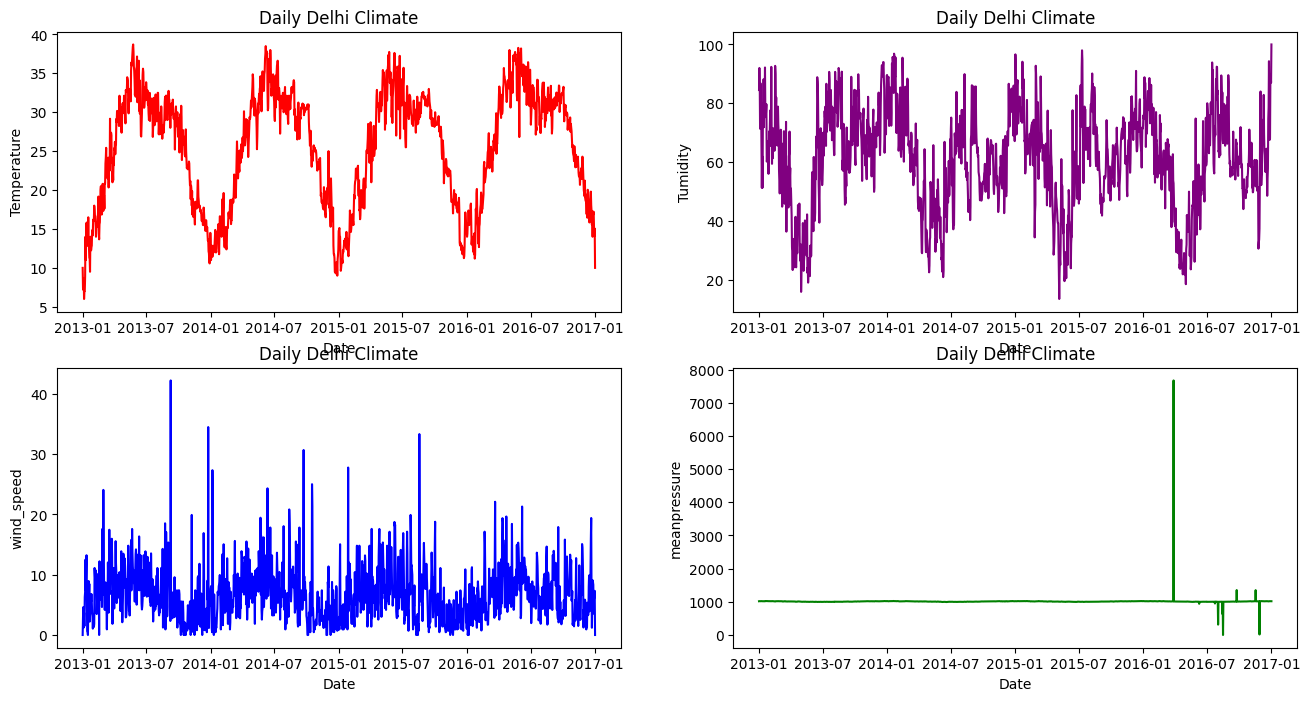

In [50]:
data1['date'] = pd.to_datetime(data1['date'])
plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(data1.date,data1.meantemp,color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Delhi Climate')

plt.subplot(2, 2, 2)
plt.plot(data1.date,data1.humidity,color='purple')
plt.xlabel('Date')
plt.ylabel('Tumidity')
plt.title('Daily Delhi Climate')

plt.subplot(2, 2, 3)
plt.plot(data1.date,data1.wind_speed,color='blue')
plt.xlabel('Date')
plt.ylabel('wind_speed')
plt.title('Daily Delhi Climate')

plt.subplot(2, 2, 4)
plt.plot(data1.date,data1.meanpressure,color='green')
plt.xlabel('Date')
plt.ylabel('meanpressure')
plt.title('Daily Delhi Climate')

plt.show()

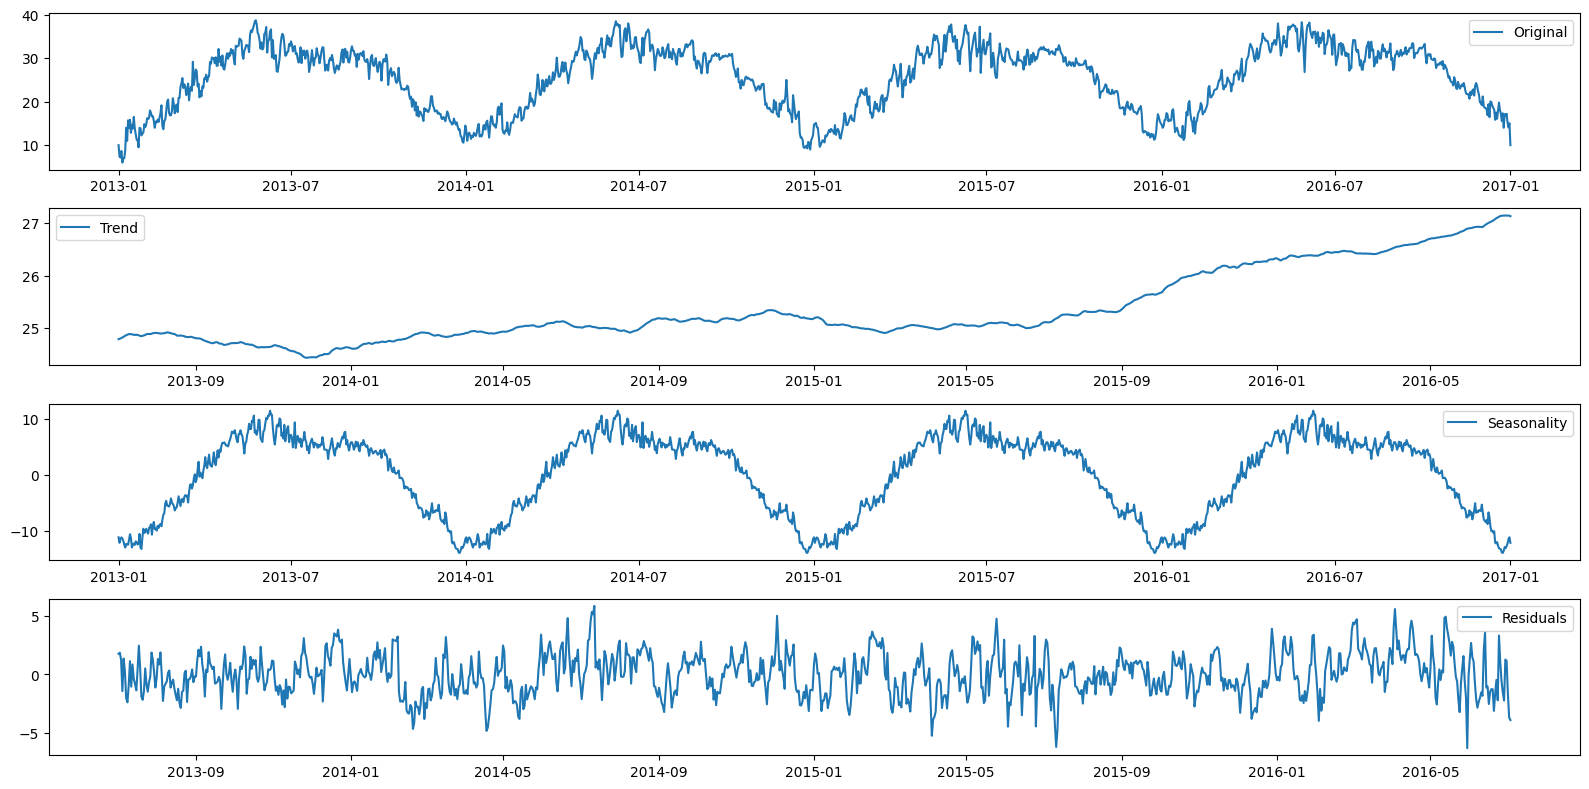

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data1['meantemp'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(data1['meantemp'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

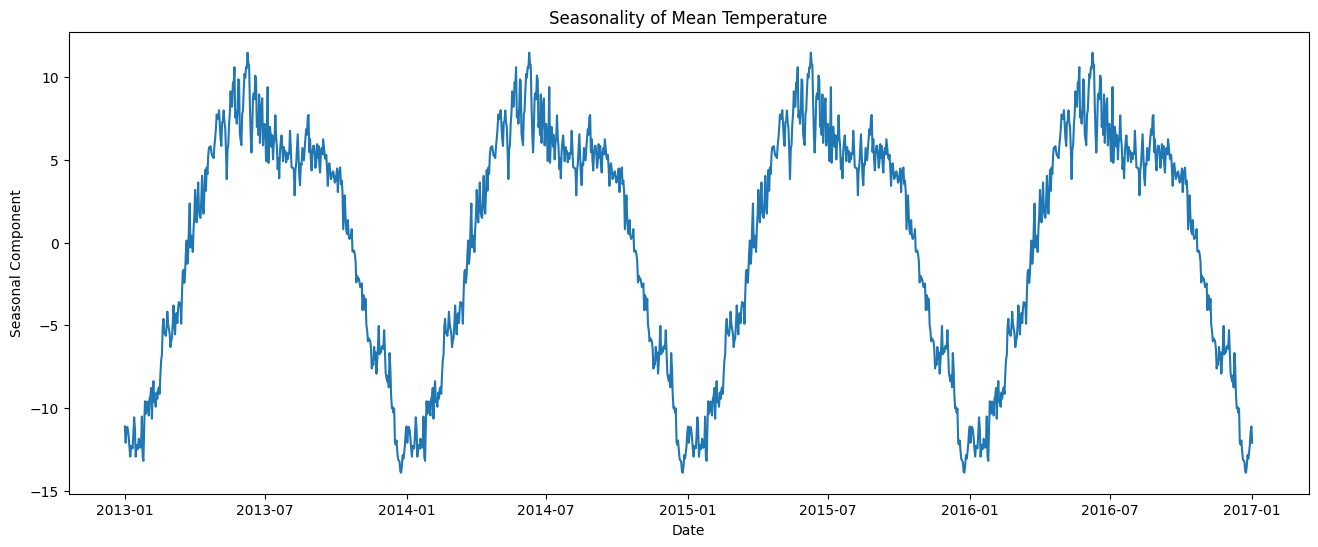

In [19]:
plt.figure(figsize=(16, 6))
plt.plot(seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonality of Mean Temperature')
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
data = data1['meantemp'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [24]:
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [25]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [26]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [27]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3072
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034
Epoch 16/50
37/37 

In [29]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [30]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [32]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1.3417180397350505
Root Mean Squared Error (RMSE): 1.7708026564767445


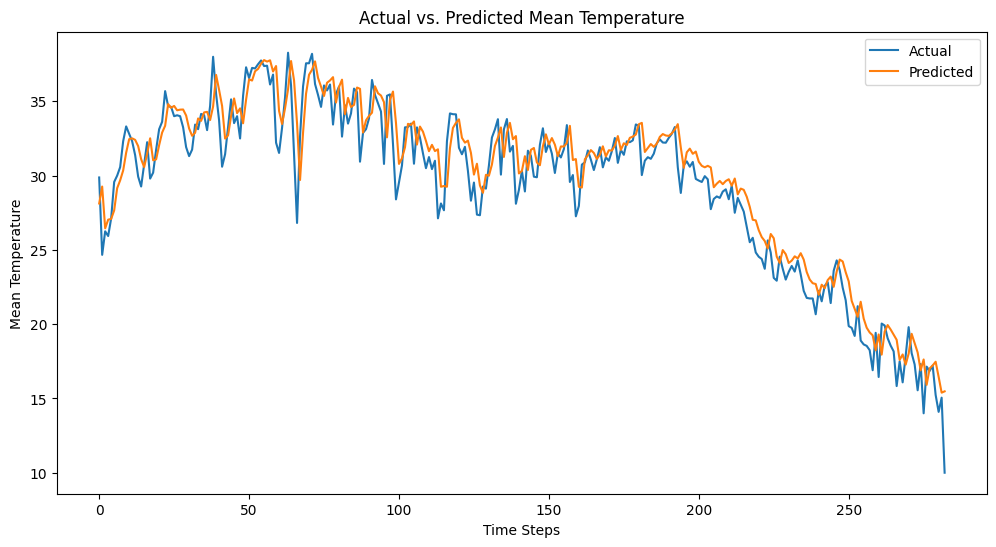

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Mean Temperature')
plt.title('Actual vs. Predicted Mean Temperature')
plt.show()